In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
import statsmodels.api as sm
import seaborn as sns

In [9]:
with open('CF_2000_2017.txt', 'r') as f:
    CF     = np.array(f.read().splitlines(), dtype=float)[:157789]
with open('price_2000_2017.txt', 'r') as f:
    Price  = np.array(f.read().splitlines(), dtype=float)
with open('Consumption.txt', 'r') as f:
    consumption = np.array(f.read().splitlines(), dtype=float)
with open('wind1.txt', 'r') as f:
    wind1       = np.array(f.read().splitlines(), dtype=float)
with open('wind2.txt', 'r') as f:
    wind2       = np.array(f.read().splitlines(), dtype=float)
with open('wind3.txt', 'r') as f:
    wind3       = np.array(f.read().splitlines(), dtype=float)
with open('wind4.txt', 'r') as f:
    wind4       = np.array(f.read().splitlines(), dtype=float)

consumption     = np.flip(consumption)
wind1           = np.flip(wind1)
wind2           = np.flip(wind2)
wind3           = np.flip(wind3)
wind4           = np.flip(wind4)
wind_production = wind1+wind2+wind3+wind4
Price           = np.flip(Price)

In [10]:
# Time index
start_date1  = '2004-12-31 01:00:00'
end_date1    = '2017-12-31 00:00:00'
time_index_n = pd.date_range(start=start_date1, end=end_date1, freq='H')
load         = consumption-wind_production
Price        = Price[-113952:]
CF           = CF[-113952:]

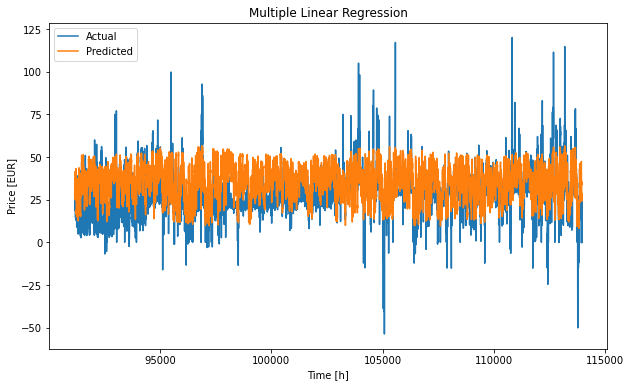

In [6]:
# Create the data and target DataFrames
data   = pd.DataFrame({'CF_': CF, 'load': load})
target = pd.DataFrame({'Price': Price})

# Split the data into training and testing sets
train_size   = int(0.8 * len(data))
train_data   = data[:train_size]
test_data    = data[train_size:]
train_target = target[:train_size]
test_target  = target[train_size:]

# Fit the linear regression model to the training data
regression_model = LinearRegression()
regression_model.fit(train_data, train_target)

# Predict the target variable using the testing data
predictions = regression_model.predict(test_data)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target['Price'], label='Actual')
plt.plot(test_target.index, predictions, label='Predicted')
plt.xlabel('Time [h]')
plt.ylabel('Price [EUR]')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

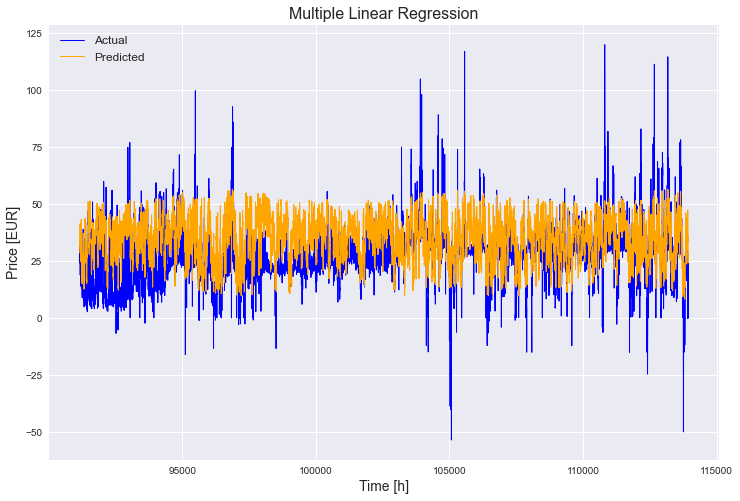

In [11]:
# Plot
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
plt.plot(test_target.index, test_target['Price'], color='blue', linewidth=1, label='Actual')
plt.plot(test_target.index, predictions, color='orange', linewidth=1, label='Predicted')
plt.xlabel('Time [h]', fontsize=14)
plt.ylabel('Price [EUR]', fontsize=14)
plt.title('Multiple Linear Regression', fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [12]:
# Calculate the correlation matrix
df = pd.DataFrame({'Price': Price, 'CF': CF, 'load': load})
correlation_matrix = df[['Price', 'CF', 'load']].corr()
print(correlation_matrix)

          Price        CF      load
Price  1.000000 -0.192119  0.414462
CF    -0.192119  1.000000 -0.509986
load   0.414462 -0.509986  1.000000
